In [ ]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [ ]:
!pip install --upgrade tensorflow-gpu

     |████████████████████████████████| 380.8MB 34kB/s 


# Propagación hacia atrás (Back propagation)

Aunque la propagacación hacia atrás se haga de manera automática en la mayoría de los paquetes computacionales es bueno que nos demos una idea de cómo funciona y su importancia dentro del DL.

Éste método fue introducido a mediados de los años 70, pero no fue hasta el año 86, cuando un [artículo](http://www.nature.com/nature/journal/v323/n6088/pdf/323533a0.pdf) publicado en la revista Nature por David Rumelhart, Geoffrey Hinton, and Ronald Williams; mostrando cómo su implementación en diferentes redes neuronales aumentava su velocidad de entrenamiento respecto a las técnicas usadas en la época, haciendo que problemas intratables hasta el momento se pudieran resolver con relativa fácilidad. Ésto hizo que la propagación hacia atrás se popularizara y que hasta ahora sea la técnica más usada en el entrenamiento de redes neuronales.

La dificultad de hacer la actualización de los pesos de una red profunda radica en el hecho de que cada peso influye en todos los pesos de la capa subsiguiente (y por tanto en todos los demás de forma indirécta), ésto nos lleva a que sea una tarea computacionalmente costosa hacer una actualización de los pesos hacia delante pues una pequeña modificación hacia adelante puede tener consecuencias gigantes en las capas sucesivas.

La propagación hacia atrás nos propone usar un método como el gradiente de descenso (iniciando con el error en la capa de salida) e ir propagando los errores hacia atrás como si cada capa fuera la salida de la anterior. Con ello podemos actualizar poco a poco y teniendo en cuenta los errores acumulados por la red. De forma efectiva estámos actualizando los pesos con toda la información disponible sin el riesgo de un efecto descontrolado en los pesos (como sucede en la propagación hacia adelante).

Son 4 las ecuaciones fundamentales del método:

Denotaremos como $L$ la última capa, $l$ las capas ocultas, $j$ una neurona de la capa $l$, $\sigma$ las funciones de activación de las capas ocultas y $a_j$ es la salida $j$ de la red ($a$ sería el vector de todas las salidas predichas por la red) y $z_j^l$ es la entrada pesada a la función de activación de la capa $l$ en la neurona $j$.




*   Una ecuación para el error de la capa de salida:
$$\delta_j ^L = \frac{\partial C}{\partial a_j}\sigma(z_j^L)$$
*   Una ecuación para el error de una capa ocualta dada por el error de la capa siguiente (error propagado hacia atráss):
$$\delta^l = ((w^{l+1})^T \delta^{l+1})\sigma(z^l)$$
*   Una ecuación para la derivada de la función de costo para cualquier bias en la red:
$$\frac{\partial C}{\partial b_j^l}= \delta_j^l$$
*    Una ecuación para la derivada parial de la función de costo respecto a cualquier peso de la red:
$$\frac{\partial C}{\partial{w_{jk}^l}}=a_k^{l-1}\delta_j^l$$


Con las dos primeras ecuaciones nos es posible calcular el error en cualquier neurona, partiendo desde la capa de salida con la primer ecuación y llendo hacia atrás (propagando el error) cuantas veces sea necesario con la segunda ecuación.

Con ello y las dos últimas es posible calcular las derivadas del costo en cualquier punto de la red y aplicando el gradiente de descenso tendríamos nuestra actualización de pesos de una forma más rápida y eficiente que con el uso de inversiones matriciales.


Con las ecuaciones a mano es fácil imaginar el algoritmo necesario para realiazar la propagación hacia atrás:
*  Cree la activación para la capa de entrada $a_1$.
*  Propague hacia adelanta para cada $l= 2,3,...,L$ calculando $z^l = w^la^{l-1}+b^l$ y $\sigma(z^l)$
*   Calcule el error de la capa de salida $\delta^L$
*   Propague hacia atrás para cada $l=l-1, l-2...2$ calculando el correspondiente $\delta^l$
*  Calcule los gradientes correspondientes a cada peso y cada bias y aplique el método de descenso de gradiente para actualizar cada peso.

Si bien ésta es algorítmo detrás del método no es necesario aprender los detalles o las ecuaciones, pues éste ya viene integrado en las bibliotecas que usamos para realizar machine learning como Scikitlearn o Keras, sin embargo si es importante comprender su uso y porqué es tan importante y usado por los científicos de datos.

# Perceptrón

  
A finales de los años 50's fue diseñado por Frank Rosenblant el perceptrón, inspirandose en los trabajos de McCulloh y Pitts, es considerada la arquitectura mas simple en Deep Learning. Básicamente es un modelo de clasificacion lineal, donde usa como función de activación la función de heaviside, la cual recordemos tiene la siguiente forma:

 $heaviside(x)=\begin{cases} 
      0 & x < 0 \\
      1 & x\geq 0 
   \end{cases} $


Donde el perceptrón es considerado un algoritmo supervisado, cuyos pesos son los $w_{i}$ y el termino $b$ (bias) que podemos ver en las imagenes. Cuando hablamos de clasificación lineal, hacemos referencia a que nuestro perceptrón solo será de utilidad en datasets que sean linealmente separables, es decir, donde podamos encontrar un hiperplano que me permita dividir en dos clases el conjunto de datos, a partir de crear fronteras de división lineal.

<div style="text-align: center;">
    <img src="https://i.imgur.com/vNWd4os.png" height="300px"/>
    <img src="https://i.imgur.com/KO0L4tk.png" />
</div>


Cuando ingresamos nuestros datos, este realiza una suma pesada definda como:

$z=\sum_{i=1}^{m}x_{i}w_{i}+b$

Es decir, cada entrada es multiplicada por un peso(el cual normalmente se inicia de forma aleatoria) y los resultados son sumados junto al b.Donde $b$ es la ordenada al origen (bias). El perceptrón perdió credibilidad por un tiempo pues, si bien podía predecir algunas compuerta lógicas, no era el caso con la  **XOR**.

<p><img alt="Colaboratory logo" height="200px" src="https://pythonmachinelearning.pro/wp-content/uploads/2017/09/Logic-Gates.png" align="center" hspace="10px" vspace="0px"></p>

<div style="text-align: center;">
    <img src="https://miro.medium.com/max/299/0*9QQhdtqhL6H2yMJ4.gif" height="200px"/>
    <img src="https://miro.medium.com/max/301/0*Ul09ZJh9XpWoE3dQ.gif" height="200px"/>
    <img src="https://miro.medium.com/max/299/0*W2evx8WUDNHOFeoA.gif" height="200px"/>
</div> 

Como se puede ver en el caso de **AND** y **OR** podemos trazar una linea que me permita obtener una clasificación correcta, cosa que no pasa con la **XOR**.


Veamos un ejemplo con el siguiente dataset el cual no es linealmente separable:

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

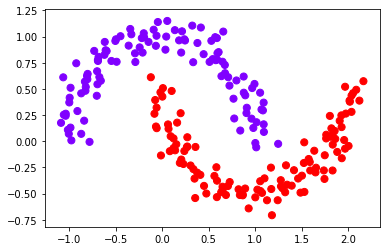

In [ ]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=300, noise=0.1,random_state=25)
X_train,X_test,y_train,y_test=train_test_split(X,y)
plt.scatter(X_train[:, 0], X_train[:, 1],c=y_train, s=50, cmap='rainbow')

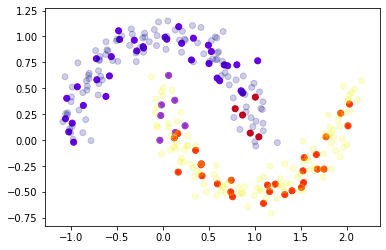

In [ ]:
model = Perceptron(tol=1e-3, random_state=25)
model.fit(X_train,y_train)
y_hat=model.predict(X_test)
plt.scatter(X_test[:,0],X_test[:,1],c=y_hat,cmap='rainbow',alpha=1)
plt.scatter(X[:,0],X[:,1],c=y,cmap='plasma',alpha=0.2)

En el gráfico anterior se puede ver que no podemos realizar de forma correcta la división de los datos, pues no se tiene una relación lineal.Veamos como esto funciona en un conjunto de datos linealmente separables 

In [ ]:
from sklearn.datasets import make_blobs

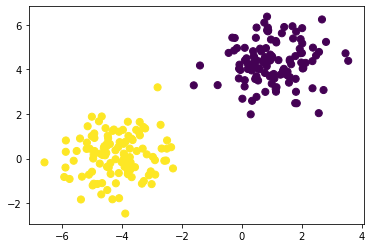

In [ ]:
X,y=make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=0.9, center_box=(-10.0, 10.0),random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y)
plt.scatter(X_train[:, 0], X_train[:, 1],c=y_train, s=50, cmap='viridis')

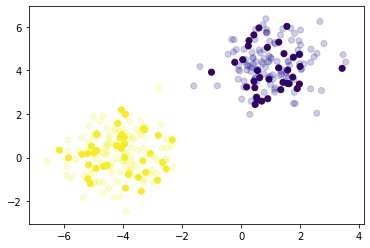

In [ ]:
model = Perceptron(tol=1e-3, random_state=0)
model.fit(X_train,y_train)
y_hat=model.predict(X_test)
plt.scatter(X_test[:,0],X_test[:,1],c=y_hat,cmap='viridis')
plt.scatter(X[:,0],X[:,1],c=y,cmap='plasma',alpha=0.2)

## Perceptrón multicapa (Red Neuronal Artificial)


Ahora que sabemos como funciona un perceptrón y sus dificultades al enfrentar datos que no presentan una clasificación lineal, podemos  dar un paso mas allá hasta lo que se conoce como red neuronal artificial, que es basicamente la conexión de varios perceptrones o neuronas a través de capaz en forma de red. Donde recordemos la diferencia entre el perceptrón y una neurona, es su función de activación.

<p><img alt="Colaboratory logo" height="300px" src="https://s3.amazonaws.com/stackabuse/media/intro-to-neural-networks-scikit-learn-3.png" align="center" hspace="10px" vspace="0px"></p>

El perceptrón multicapa a diferencia del perceptrón trabaja bien en los casos donde tenemos datos separables no lineales.En las redes neuronales tenemos una capa de entrada, otra de salida y una o multiples capaz ocultas.Como se puede ver las conexiones siempre están dirigidas hacia adelante es decir, las neuronas de una capa se conectan con las neuronas de la siguiente capa, de ahí que reciban también el nombre de redes alimentadas hacia adelante o redes ”feedforward".

Los pesos dentro de nuestra red neuronal típicamente están expresados como $w_{ij}^{[l]}$, donde "$l$" hace referencia a nuestra capa.Para el caso de varios perceptrones nuestra suma está dada por:

\begin{equation}
z_{k}^{[l]}=\sum_{j=1}^{n^[l-1]}x_{j}^{[l-1]}w^{[l]}_{jk}+b_{k}
\end{equation}

Donde tenemos que $n^{[l]}$ hace referencia al número de neuronas en la capa $l$. De forma matricial podemos expresar la anterior ecuación para la capa $l$ como:

\begin{equation}
Z^{[l]}=X^{[l-1]}W^{[l]}+B^{[l]}
\end{equation}

Donde $X$ es la matriz de tamaño $m\times n^{[l-1]}$, $W^{[l]}$ de $n^{[l-1]}\times n^{[l]}$ y $B$ de $1\times n^{[l]}$. Donde de nuevo $n^{[l]}$ hace referencia al número de neuronas en la capa $l$. Como se puede ver, al momento de operar debe hacerse un broadcasting con $B$ de forma tal que podamos resolver nuestra ecuación matricial.

Donde tenemos que $X^{[l]}$ viene dada por 

\begin{equation}
X^{[l]}=f^{[l]}(Z^{[l]})
\end{equation}

Con $f^{[l]}$ la función de activación de la capa $l$.

###Ejercicio

Con los siguientes vector, escalar y los datos de entrada de la compuerta lógica **AND**, escribir una función que regrese las salidas correctas, usando un perceptrón. 

$W =
 \begin{pmatrix}
  1  \\
  1 \\
 \end{pmatrix}$

$B=-1.5$

Haga click **aquí** si tiene problemas con la solución:

<!-----
import numpy as np

def And(X,W,B):
  X1=np.heaviside(np.dot(X,W)+B,1)
  return(X1)
  
X=np.array([[0,0],[0,1],[1,0],[1,1]])
W=np.array([1,1])
B=-1.5
y=And(X,W,B)
print(y)
----->

# Funciones de activación:

El proceso que describimos de los pasos de una neurona consisten en:

- Entrada de los datos, o vector de características.

- Ajuste lineal de los datos.

- Mapeo del ajuste a una función no lineal.

Gráficamente, los pasos anterior se ilustran en la siguiente figura:


<img alt="Colaboratory logo" height="220px" src="https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/nn_rep.png?raw=true" align="center">

En este ejemplo, se ha definido en la neurona una función de activación sigmoide $\sigma(z)$. En red multicapas, el 
problema se ilustra gráficamente como:

<img height=330px src="https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/msNN_v2.png?raw=true" align="center">

en donde $a_i^{[l]}$ representa el resultado de aplicar la función de activación en la i-ésima neurona de la l-ésima capa. 

Teniendo en cuenta que una neurona consite en la composición de funciónes de un ajuste lineal y una activación, la salida de todos los ajuste de las neuronas de la capa oculta puede ser expresada en un vector de la forma:

$$z^{[1]}=W^{[1]}x+b^{[1]}\hspace{0.5cm}(1)$$

y que corresponde al ajuste lineal de cada neurona de la capa (capa 1 en este caso), seguida de un activación:

$$a^{[1]}=g^{[1]}(z^{[1]})\hspace{0.5cm}(2)$$

Similarmente, para una segunda capa, procesaría las activaciones $a^{[1]}$ generadas a la salida de la capa 1, nuevamente, realizando un ajuste lineal seguido de una activación. Matematicamente esto equivale a:

$$z^{[2]}=W^{[2]}a^{[1]}+b^{[2]}\hspace{0.5cm}(3)$$

$$a^{[2]}=g^{[2]}(z^{[2]})\hspace{0.5cm}(4)$$

Estas cuatro ecuaciones caracterizan, escencialmente, a una red neuronal.

Respecto al funcionamiento de la red y la función de activación asociada a una neurona nos surgen los siguientes interrogantes principales:

1. ¿Cuál es la necesidad de introducir una función de activación por neurona?

2. ¿Cuáles son las diferentes funciones de activación?

3. ¿Que función de activación debemos usar en las diferentes capas?.

4. ¿Cómo le indicamos a `keras` las funciones de activación por capas?.

## 1. No linealidad en las redes neuronales: necesidad de funciones de activación.

Veamos que pasa si asumimos una respuesta lineal de las reuronas (dada a partir de le función de activación) de una red neuronal; matemáticamente, esto quiere decir,

$$g(z)=z \hspace{0.5cm} (5)$$

Introduciendo esta ecuación en las ecuación (2) tenemos que:

$$a^{[1]}=z^{[1]}\hspace{0.5cm}(2a)$$

por lo que, de las ecuacion (1), (3) y (4) tenemos que: 

$$a^{[2]}=z^{[2]}=W^{[2]}(W^{[1]}x+b^{[1]})+b^{[2]}\hspace{0.5cm}(3a)$$

Reagrupando, llegamos a la siguiente expresión:

$$a^{[2]}=z^{[2]}=\underbrace{W^{[2]}W^{[1]}}_{W'}x+\underbrace{(W^{[2]}b^{[1]}+b^{[2]})}_{b'}\hspace{0.5cm}(3b)$$

Por lo tanto la expresión (3b) se reduciría, nuevamente, a un ajuste lineal:

$$a^{[2]}=z^{[2]}=W'x+b'$$

Por lo tanto, si tenemos una red neuronal con muchas capas, todas con una función de activación lineal, o lo que es lo mismo, sin función de activación, colapsan a una sola neurona en la que se realiza un ajuste linea en donde el modelo no "aprende" nada nuevo a medida que adicionamos capas.

La **función de activación** es la encargada de introducir un comportamiento no lineal, con el fin de poder "aprender" algo de los datos de entrada. En resumen, podemos afirmar que:

Las funciones de activacción se utilizan para propagra la salida de los nodos de un capa hacia la siguiente capa. Las funciones de activación son funciones que van de los escalares a los escalares, produciendo la activación de la neurona. Las funciones de activación en las capas ocultas de las redes neuronales se usan con el fin de introducir una no-liniaridad en las capacidades de modelado del la red. 

De esta forma, hemos dado respuesta a la pregunta 1 sobre la necesidad de introducir dichas funciones de activación. Veamos ahora cuales son dichas funciones de activación.

## Tipos de funciones de activación:

### Lineal: 

Una transformación lineal, la cual se muestra en la siguiente figura, consiste, básicamente, en la función identidad, en donde la variable dependiente tiene una relación directa y proporcional con la variable independiente. En términos prácticos, lo anterior significa que una función de activación lineal pasa la señal sin realizar un cambio sobre esta.

<img height=300px src="https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/linear_af.png?raw=true">

Este el típo de activación que se usa en la capa de entrada de las redes neuronales.

### Sigmoide:

Como todas las transformaciones logística, las sigmoides puede reducir la cantidad de valores extremos o outliers en los datos sin eliminarlos. En la siguiente figura se ilustra dicha función sigmoide:

<img height=300px src="https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/sigmoid_af.png?raw=true">

Una función sigmoide convierde una variable independiente de rango infinito en probabilidades con un rango entre 0 y 1. La mayoria de las salidas serán cercanas a 0 o 1, que corresponden a zonas de saturación.

La función de activación sigmoide devuelve una probabilidad independiente para cada clase.

### Tanh

Corresponde a una función trigronométrica hiperbólica (ver siguiente figura), la cual representa la cual es igual a:

$$\text{tanh}(x) = \frac{\text{sinh(x)}}{\text{cosh(x)}}=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$

<img height=300px src="https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/tanh_af.png?raw=true">

A diferencia de la función sigmoide, el rango de salida de tanh varía entre -1 y 1. La ventaja de tanh es puede tratar los números negativos de forma más eficiente que la función sigmoide.

### ReLU: Rectified Linear Unit (Unidad Rectificadad Lineal)

La unidad rectificada lineal es una trasformación más intersante que activa un nodo solo si la entrada se encuentra por encima de cierta cantidad. Si la entrada está por debajo de zero, la salida es cero, pero si la entrada alcanza un valor umbral, la salida tiene una relación lineal con la valriabe dependiente $\text{max}(0,x)$, como se observa en la siguiente figura:

<img height=350px src="https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/relu_af.png?raw=true">

Las funciones de activaciones ReLU represetan actualmente el estado de arte en la aplicación de funciones de activación, ya que han demostrado un buen desempeño en diferentes situaciones. Dado que el gradiente de la ReLU es ceero o constante, permite evitar el problema del desvanecimiento del gradiente. Las funciones de activación ReLu han demostrado un mejor entrenamiento en la práctica que las funciones de activación sigmoidea. 

Las funciones de activación ReLU se usan, normalmente, en las capas ocultas.

Existen varias funciones de activación más, no obstante, nos centraremos a continuación en la descrisición de una función de activación usada en la capa de salida para la clasificación multiclase mediante una red neuronal, conocida como Softmax.

## Softmax

La función de activación Softmax representa una generalización de la regresión logística en el sentido que puede ser apllicada a un conjunto continues de datos (en lugar de una clasificación binaria) y puede contener múltiples fronteras de desición. Esta función maneja sistemas multinomiales para el etiquetado. Softmax es una función que normalmente se usa en la capa de salida de un clasificador.

La función de activación Softmax devuelve la distribución de probablilidades de clases mutuamente excluyentes.

Consideremos el siguiente ejemplo en donde se ilustra, entre otra cosas la definición de la función SoftMax:

<img height=200px src="https://miro.medium.com/max/906/1*670CdxchunD-yAuUWdI7Bw.png">

En deep learning, el térno capa logit se usa para la última capa de neuronas de la red neuronal para el problema de clasificación que produce unos valores de predicción "crudos" de valores reales que varian en el intervalo $(-\infty,\infty)$. En concreto, las cantidades logits son los puntajes crudos de la ultima capa de la red neuronal, antes de que se les aplique la activación. 

Apliquemos definición de la función softmax para desarrollar una intuición de lo que esta significa:

In [ ]:
logits = [2.0, 1.0, 0.1] # Definición de los valores logits
exps = [np.exp(i) for i in logits] # Calculo de los numeradores de la ecuación.

sum_of_exps = sum(exps)# Cálculo del denominador

softmax = [j/sum_of_exps for j in exps] # Cálculo del denominador

softmax

[0.6590011388859679, 0.2424329707047139, 0.09856589040931818]

In [ ]:
sum(softmax)

1.0

Si cada logit representa el punta en crudo asociado a una clase (grande, mediano, pequeño, por ejemplo), entoncees el valor sofmax asociado a cada clase representa la probabilidad o porcentaje de pertenencia a esa clase. 

## 4. Como usar las diferentes funciones de activación en keras:

Para consultar las diferentes formas puede acceder a la documentación de kerras [aquí](https://keras.io/activations/).

Existen formas formas para usar las funciones de activación en `keras`:

1. A través de una capa, usando el método `Activation`. 
2. Mediante el argumento `activation` soportado por todas las capas posteriores.
3. Mediante una función `TensorFlow/Theano/CNTK` por elementos.

In [ ]:
import numpy as np
from tensorflow import keras

In [ ]:
# 1: A través de una capa medidante el método Activación:
modelA = keras.models.Sequential()
modelA.add(keras.layers.Dense(32, input_shape=(16,)))
modelA.add(keras.layers.Dense(64))
modelA.add(keras.layers.Activation('tanh'))#  Capa activación
modelA.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
activation (Activation)      (None, 64)                0         
Total params: 2,656
Trainable params: 2,656
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Mediante el argumento activation
modelB = keras.models.Sequential()
modelB.add(keras.layers.Dense(32, input_shape=(16,)))
modelB.add(keras.layers.Dense(64, activation='tanh'))
modelB.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
Total params: 2,656
Trainable params: 2,656
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Mediante una función de Tensor-flow por elementos.
from keras import backend as K
modelC = keras.models.Sequential()
modelC.add(keras.layers.Dense(32, input_shape=(16,)))
modelC.add(keras.layers.Dense(64, activation=K.tanh))
modelC.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
Total params: 2,656
Trainable params: 2,656
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


### Funciones de activación principales en `Keras`

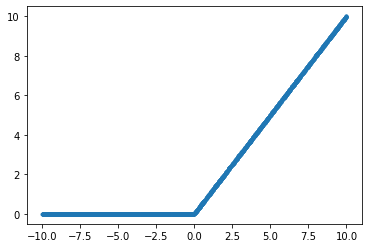

In [ ]:
# Relu
import matplotlib.pyplot as plt

x=np.random.uniform(low=-10.0, high=10, size=(2000,))
y=keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0)

plt.plot(x,y,'.')

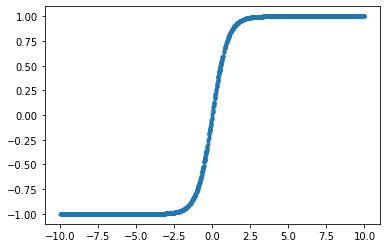

In [ ]:
# tanh

y=keras.activations.tanh(x)

plt.plot(x,y,'.')

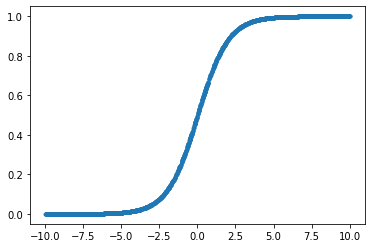

In [ ]:
#sigmoid

y=keras.activations.sigmoid(x)

plt.plot(x,y,'.')


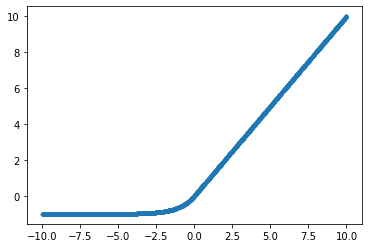

In [ ]:
# elu
y=keras.activations.elu(x, alpha=1.0)
plt.plot(x,y,'.')

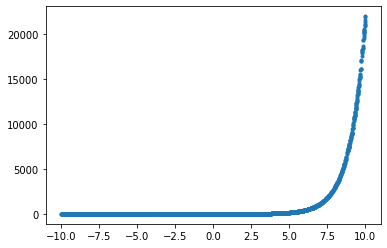

In [ ]:
# Exponential
y=keras.activations.exponential(x)
plt.plot(x,y,'.')

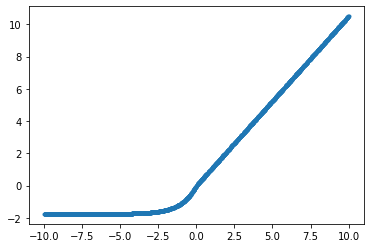

In [ ]:
# Selu 
y=keras.activations.selu(x)
plt.plot(x,y,'.')

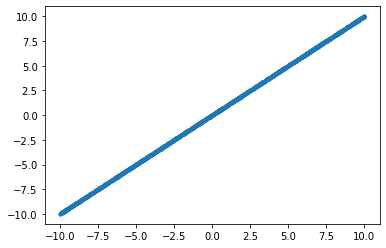

In [ ]:
# Linear
y=keras.activations.linear(x)
plt.plot(x,y,'.')

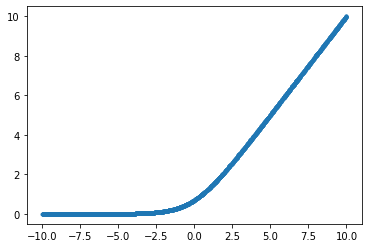

In [ ]:
y=keras.activations.softplus(x)
plt.plot(x,y,'.')

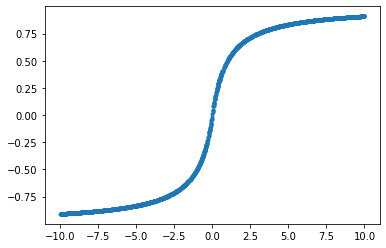

In [ ]:
y=keras.activations.softsign(x)
plt.plot(x,y,'.')

# Problema 

Implementar un modelo de red neuronal usando Keras para predecir los sobrevivientes del titanic. El modelo debe tener dos capas ocultas densas con 16 neuronas cada una y funcion de activacion relu. como optimizador usar descenso del gradiente estocástico como función de pérdida usar binary_crossentropy y como métrica usar accuracy. 

# Solucion 



Importemos algunas de las librerias que nos seran de utilidad

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/titanic.csv')

Inspeccionamos un poco el dataset

In [ ]:
data.shape

(891, 12)

In [ ]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
727,728,1,3,"Mannion, Miss. Margareth",female,NaN,0,0,36866,7.7375,NaN,Q


* PassengerIdUnique ID of the passenger
* SurvivedSurvived (1) or died (0)
* PclassPassenger's class (1st, 2nd, or 3rd)
* NamePassenger's name
* SexPassenger's sex
* AgePassenger's age
* SibSpNumber of siblings/spouses aboard the Titanic
* ParchNumber of parents/children aboard the Titanic
* TicketTicket number
* FareFare paid for ticket
* CabinCabin number
* EmbarkedWhere the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown)

Removamos algunas de las características que en principio no parecen ser importantes.

In [ ]:
data.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1, inplace=True)

In [ ]:
data.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
62,0,1,male,45.0,1,0,83.475
56,1,2,female,21.0,0,0,10.500
401,0,3,male,26.0,0,0,8.050
595,0,3,male,36.0,1,1,24.150
337,1,1,female,41.0,0,0,134.500


Llenemos los valores faltantes en la columna ‘Age’ usando el promedio

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
data.loc[data['Survived']==1,['Age']]=imp.fit_transform(data.loc[data['Survived']==1,['Age']])
data.loc[data['Survived']==0,['Age']]=imp.fit_transform(data.loc[data['Survived']==0,['Age']])

In [ ]:
data.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
dtype: bool

Apliquemos one-hot-encoding a la caracteristica categorica ***sex*** y ademas creemos una nueva columna que se llamada "Family_size".

In [ ]:
data=pd.get_dummies(data)

In [ ]:
data['Family_size']=data['SibSp'] + data['Parch']
data.drop(['SibSp', 'Parch'] ,axis=1, inplace=True)
data.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Family_size
0,0,3,22.0,7.2500,0,1,1
1,1,1,38.0,71.2833,1,0,1
2,1,3,26.0,7.9250,1,0,0
3,1,1,35.0,53.1000,1,0,1
4,0,3,35.0,8.0500,0,1,0


Dividamos el Dataset en una parte de entrenamiento y en otra de testeo usando Sklearn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0],test_size = 0.2, random_state=0)

In [ ]:
X_train.shape

(712, 6)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape

(712, 6)

Ahora creemos nuestra red neuronal usando keras 

In [ ]:
from tensorflow import keras

In [ ]:
keras.backend.clear_session()

Creemos nuestro modelo usa la API Squential

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Dense(16,activation='relu', input_shape=(6,)),
                                 keras.layers.Dense(16,activation='relu'),
                                 keras.layers.Dense(1, activation='sigmoid')
])

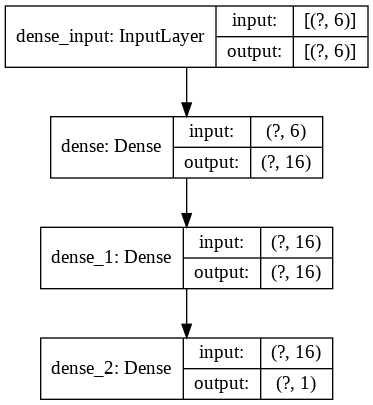

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

Ahora compilemos el modelo

In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

Ahora entrenemos nuestro modelo 

In [ ]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
history=model.fit(X_train_scaled,y_train, epochs=50, validation_split=0.2)

Train on 569 samples, validate on 143 samples
Epoch 1/50
569/569 [==============================] - 1s 1ms/sample - loss: 0.7047 - accuracy: 0.5132 - val_loss: 0.7229 - val_accuracy: 0.4895
Epoch 2/50
569/569 [==============================] - 0s 85us/sample - loss: 0.6602 - accuracy: 0.5905 - val_loss: 0.6848 - val_accuracy: 0.5105
Epoch 3/50
569/569 [==============================] - 0s 71us/sample - loss: 0.6268 - accuracy: 0.6081 - val_loss: 0.6544 - val_accuracy: 0.5105
Epoch 4/50
569/569 [==============================] - 0s 75us/sample - loss: 0.6006 - accuracy: 0.6309 - val_loss: 0.6294 - val_accuracy: 0.5455
Epoch 5/50
569/569 [==============================] - 0s 77us/sample - loss: 0.5792 - accuracy: 0.6819 - val_loss: 0.6075 - val_accuracy: 0.6224
Epoch 6/50
569/569 [==============================] - 0s 78us/sample - loss: 0.5616 - accuracy: 0.7206 - val_loss: 0.5889 - val_accuracy: 0.6713
Epoch 7/50
569/569 [==============================] - 0s 77us/sample - loss: 0.5466 -

Ahora utilicemos nuestro modelo ya entrenado sobre los datos de testeo

In [ ]:
model.evaluate(X_test_scaled,y_test)

179/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4143652030209589, 0.79888266]

visualicemos nuestros resultados 

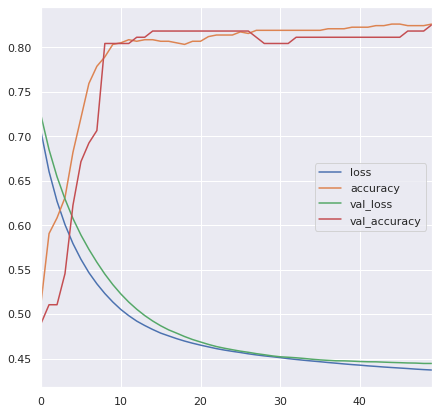

In [ ]:
pd.DataFrame(history.history).plot(figsize=(7,7))